# Problema del Viajante con Ventana de Tiempo.
### Autor: Saúl Sosa Díaz

En este cuaderno Jupyter, nos sumergiremos en el fascinante mundo del [Problema del Viajante](https://es.wikipedia.org/wiki/Problema_del_viajante) con Ventana de Tiempo (TSP con ventana de tiempo), brindando una explicación detallada y presentando un modelo matemático para su resolución. Además, exploraremos la aplicación práctica de este problema, planteando un escenario hipotético que simula una situación que podríamos enfrentar en la vida cotidiana.

---
## El problema básico.
El Problema del Viajante, conocido comúnmente como _TSP_ (por sus siglas en inglés, Traveling Salesman Problem), es uno de los problemas combinatorios más estudiados y desafiantes en el mundo de la optimización y las matemáticas aplicadas. El objetivo principal del _TSP_ es determinar el recorrido más corto que un viajante puede tomar para visitar un conjunto de ciudades y regresar al punto de partida, visitando cada ciudad exactamente una vez.

Sin embargo, la variante con ventana de tiempo introduce una capa adicional de complejidad. En esta variante, no basta con simplemente encontrar el camino más corto; ahora cada ciudad tiene un intervalo de tiempo específico durante el cual debe ser visitada.

Por tanto, En esencia, el núcleo del problema se mantiene intacto, solo que ahora presenta una complejidad adicional. Por esta razón, iniciaremos presentando un modelo para el problema del viajante de comercio tradicional y, posteriormente, lo adaptaremos a su versión con ventana de tiempo.

Hay diversas formas de representar el TSP, pero en este cuaderno Jupyter, nos centraremos en el siguiente modelo:

Por supuesto. Aquí te dejo una definición matemática del Problema del Viajante (TSP):

Sea $ G = (V,A)$ un grafo dirigido y completo, donde $ V$ es un conjunto de vértices que representan las ciudades y $ A$ es un conjunto de arcos que representan las posibles rutas entre ciudades. Asociado a cada arco $ (i,j) \in A$ hay un costo $c_{ij}$, que representa la distancia o el tiempo requerido para viajar de la ciudad $ i$ a la ciudad $ j$.

El objetivo del TSP es encontrar un circuito hamiltoniano de costo mínimo en $ G$, es decir, un recorrido que empiece y termine en el mismo vértice, visite cada uno de los otros vértices exactamente una vez y tenga el menor costo total posible.

Supondremos que $δ⁺(S) = \{(i,j) \in A : i \in S \land j \notin S\}$ y que $δ⁻(S) = δ⁺(V\setminus S)$.
Es decir, que estas notaciones se refieren a cómo se conectan nodos en un grafo entre sí. **$δ⁺(S)$** indica todas las rutas que comienzan en un grupo específico de nodos y terminan fuera de ese grupo. Por otro lado, **$δ⁻(S)$** representa todas las rutas que llegan a ese grupo de nodos desde aquellos que no están en el grupo.
Además, supondremos una función $X(F) = \sum_{i \in F} \sum_{j \in F, j \neq i} x_{ij}$.  

 
$\text{Donde }x_{ij} = \begin{dcases}
   1 &\text{Si el recorrido va de la ciudad } i \text{ a la ciudad } j. \text{ }\forall i \in V \land \forall j \in V \land j \neq i\\
   0 &\text{Otro caso}.
\end{dcases}$

Es decir, la función $X(F)$ toma un conjunto específico de nodos $F$ y suma todos los valores asociados con las conexiones entre las nodos en ese conjunto.

Formalmente, se busca:
$$
    \begin{array}{ccc}
        &\min \sum_{i \in V} \sum_{j \in V, j \neq i} c_{ij} x_{ij}
    \end{array}
$$

sujeto a:
$$
    \begin{array}{ccc} &
    \\ X(δ⁺(i)) = 1 \quad \forall i \in V \quad \text{De cada nodo sale exactamente una arista.}\\
    X(δ⁻(i)) = 1 \quad \forall i \in V \quad \text{A cada nodo le llega exactamente una arista.} & \\
    X(A(S)) \geq |S| - 1 \quad \forall S \subset V \setminus \{1\}\quad \text{Evitar los subtours.} & \\
    X_{ij} \in \{0,1\} \quad\forall i \in V \land \forall j \in V 
    \end{array}
$$

Este modelo representa adecuadamente el TSP. Sin embargo, presenta un inconveniente. La familia correspondiente a la tercera restricción es colosal, con una cardinalidad paroximada de $2^n$ restricciones. 
A pesar de esto, en la práctica, suele requerir aproximadamente $n$ restricciones. Por lo tanto, podemos gestionar estas restricciones de manera dinámica, proporcionandole estas restricciones progresivamente, según las vaya necesitando.


## TSP con ventanas temporales.

El problema posee una estructura análoga, pero requiere la incorporación de datos adicionales:

* Se introduce una matriz $T = [t_a : a \in A]$ que representa el tiempo que se tarda en recorrer un arco.
* Contamos con un conjunto de tiempos $E = [e_i : i = 2 \dots n]$, donde se indica el momento en que se abre la ventana temporal para un nodo $i$.
* De manera similar, tenemos un conjunto $L = [l_i : i = 2 \dots n]$ donde se señala el instante en que cierra la ventana temporal para un nodo $i$.
* Además, se define otro conjunto de tiempos $s = [s_i : i = 2 \dots n]$ que corresponde al tiempo de servicio en cada nodo $i$.

Vamos a abordar el problema permitiendo esperas.

El modelo para resolver este problema sería el siguiente:

__Variables.__

$x_{ij} = \begin{dcases}
   1 &\text{Si el recorrido va de la ciudad } i \text{ a la ciudad } j. \text{ }\forall i \in V \land \forall j \in V \land j \neq i\\
   0 &\text{Otro caso}.
\end{dcases}$

$u_{i} = \text{Momento en el que se alcanza el nodo } i. \quad \forall i = 2 \dots n$ 

__Función Objetivo__
$$
    \begin{array}{ccc}
        &\min \sum_{i \in V} \sum_{j \in V, j \neq i} c_{ij} \cdot x_{ij}
    \end{array}
$$

__Restricciones__
$$
    \begin{array}{ccc} &
    \\ X(δ⁺(i)) = 1 \quad \forall i \in V \quad \\
    X(δ⁻(i)) = 1 \quad \forall i \in V \quad \\
    X(A(S)) \geq |S| - 1 \quad \forall S \subset V \setminus \{1\}\quad \\
    e_i \leq u_i \leq l_i \quad \forall i \in V \setminus \{1\} & \\
    u_j \geq u_i + s_i + t_{ij} \cdot x_{ij} - M \cdot (1 - x_{ij}) \quad \forall i \in V \land \forall j \in V \land j \neq i & \\
    X_{ij} \in \{0,1\} \quad\forall i \in V \land \forall j \in V 
    \end{array}
$$
Donde $M$ es un número muy grande, $M \in \mathbb{R}$, la cual podría ser el mayor valor de $L$.


## Supuesto.
Para ejemplificar este problema, consideremos el siguiente supuesto basado en la trilogía de cinco partes escrita por Douglas Adams: _La guía del autoestopista galáctico_.

Arthur Dent ha descubierto la respuesta al enigma de la vida, el universo y todo lo demás, la cual es 42. No obstante, ahora se encuentra en la búsqueda de la pregunta correspondiente. Marvin, el robot depresivo de la nave, le ha sugerido que en diversos planetas podría conversar con habitantes mientras disfruta de un té y posiblemente descubrir partes de dicha pregunta. Sin embargo, estos planetas tienen horarios de apertura y cierre ¡Maldita burocracia!.  
Un factor a considerar es la presencia de Zaphod Beeblebrox, quien suele generar inconvenientes en los lugares que visita, por lo que es prudente evitar retornar a los mismos sitios. Dada la vastedad del universo, Arthur tiene el objetivo de minimizar el consumo de combustible en su travesía.

### Detalles del escenario.
Arthur está en el Restaurante del Fin del Mundo, disfrutando de una cena mientras el universo llega a su fin.

Destinos y ventanas de tiempo:
* **Planet Squornshellous Zeta**: Debe encontrar a Zem, el cuidador de colchones, entre las 1.00 y 1.30 horas galácticas estándar.  
* **Trillia**: Entre las 2.00 y 2.45 horas galácticas estándar, busca a Lunkwill y Fook, los programadores de la supercomputadora Pensador Profundo. Ellos poseen otro fragmento.  

* **Brontitall**: La ventana es de 3.00 a 4.00 horas galácticas estándar. Debe localizar a Leovinus, el arquitecto de las estatuas de lápida. Se dice que conoce una pieza crucial de la pregunta.
  
* **Kakrafoon**: Debes encontrarte con Pralite Monks en el Gran Templo del Silencio entre las 5.00 y 6.00 horas galácticas estándar. Tienen en su poder el último fragmento.

## Resolución del problema.
Importamos los paquetes necesarios.

In [14]:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")
Pkg.add("Graphs")
Pkg.add("GraphRecipes")
Pkg.add("Plots")

using GraphRecipes, Plots, Graphs
using JuMP, GLPK, Random, Test, LinearAlgebra


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


### Introducimos los datos.

In [15]:
Cmax = [0 84 0 0 0 0 0 0 0 0;
     0 0 0 0 0 0 0 0 0 0;
     0 94 0 0 0 0 119 0 0 0;
     0 0 65 0 0 0 0 0 0 0;
     0 0 0 112 0 119 0 0 0 0;
     0 0 99 0 0 0 119 0 0 0;
     0 0 0 0 0 0 0 53 0 0;
     0 87 0 0 0 0 0 0 78 0;
     76 0 0 0 0 0 0 0 0 80;
     70 0 0 0 0 0 0 0 0 0
     ]
Costs = [0 12 0 0 0 0 0 0 0 0;
          0 0 0 0 0 0 0 0 0 0;
          0 7 0 0 0 0 14 0 0 0;
          0 0 10 0 0 0 0 0 0 0;
          0 0 0 6 0 7 0 0 0 0;
          0 0 4 0 0 0 13 0 0 0;
          0 0 0 0 0 0 0 7 0 0;
          0 5 0 0 0 0 0 0 14 0;
          11 0 0 0 0 0 0 0 0 5;
          5 0 0 0 0 0 0 0 0 0] 
s = 5
t = 2
n=size(Cmax,1)

10

Comprobamos que el grafo corresponde con el mapa de Tenerife.
Donde __los números entre paréntesis son las capacidades y los costes los del corchete.__

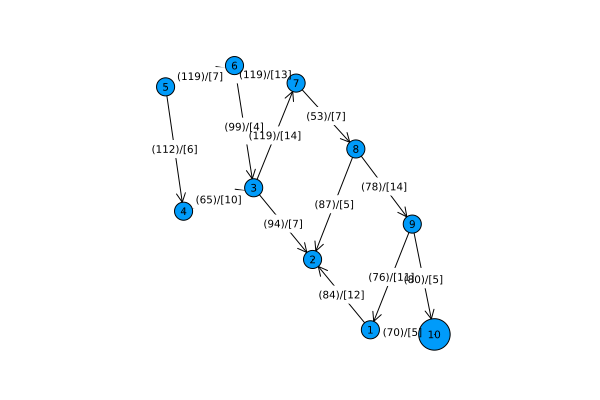

In [16]:
function graph(C, Costs)
    edgelabel_dict = Dict()
    edgelabel_mat = Array{String}(undef, n, n)
    for i in 1:n
        for j in 1:n
            capacity = C[i, j]
            cost = Costs[i, j]
            edgelabel_mat[i, j] = edgelabel_dict[(i, j)] = string("($capacity)/[$cost]")
        end
    end
    edgelabel_vec = edgelabel_mat[:]
    graphplot(C, names=1:n, edgelabel=edgelabel_dict, node_dists=1000 ,curvature_scalar=0, nodeshape=:circle,  nodesize=0.2)
end

graph(Cmax, Costs)

Vemos que el grafo corresponde con el mapa proporcionado por el cliente.
Modificamos las capacidades y los costes para añadir la arista $t-s$ con una capacidad infinita y el coste $-M$.

In [17]:
M = 10000000000000
Costs[t,s] = -M
Cmax[t,s] = M

10000000000000

### Construir el modelo.
Si las capacidades $Cmax$ y los costes $Costs$ son números enteros, las variables resultantes resultarán también números enteros, la matriz es unimodular. Como explica González Salazar, J.J. (2001, p. 217). Programación Matemática.

In [18]:
model = Model(GLPK.Optimizer)
set_silent(model)

# Definir variables
@variable(model, x[1:n,1:n] >= 0)

# Definir función objetivo
@objective(model, Min, sum(Costs[i,j] * x[i,j] for i in 1:n, j in 1:n ))

# Definir restricciones
for i in 1:n
        for j in 1:n
                if Cmax[i, j] > 0
                        @constraint(model, x[i, j] <= Cmax[i, j])
                else
                        set_upper_bound(x[i,j], 0)
                end
        end
end


@constraint(model, c[i = 1:n],  sum(x[i, :])  - sum(x[:, i]) == 0)

10-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape}}:
 c[1] : -x[2,1] - x[3,1] - x[4,1] - x[5,1] - x[6,1] - x[7,1] - x[8,1] - x[9,1] - x[10,1] + x[1,2] + x[1,3] + x[1,4] + x[1,5] + x[1,6] + x[1,7] + x[1,8] + x[1,9] + x[1,10] = 0
 c[2] : x[2,1] - x[1,2] - x[3,2] - x[4,2] - x[5,2] - x[6,2] - x[7,2] - x[8,2] - x[9,2] - x[10,2] + x[2,3] + x[2,4] + x[2,5] + x[2,6] + x[2,7] + x[2,8] + x[2,9] + x[2,10] = 0
 c[3] : x[3,1] + x[3,2] - x[1,3] - x[2,3] - x[4,3] - x[5,3] - x[6,3] - x[7,3] - x[8,3] - x[9,3] - x[10,3] + x[3,4] + x[3,5] + x[3,6] + x[3,7] + x[3,8] + x[3,9] + x[3,10] = 0
 c[4] : x[4,1] + x[4,2] + x[4,3] - x[1,4] - x[2,4] - x[3,4] - x[5,4] - x[6,4] - x[7,4] - x[8,4] - x[9,4] - x[10,4] + x[4,5] + x[4,6] + x[4,7] + x[4,8] + x[4,9] + x[4,10] = 0
 c[5] : x[5,1] + x[5,2] + x[5,3] + x[5,4] - x[1,5] - x[2,5] - x[3,5] - x[4,5] - x[6,5] - x[7,5] - x[8,5] - x[9,5] - x[10,5] + x[5,6]

Mostramos el modelo.

In [19]:
print(model)

### Resolvemos el modelo.

In [20]:
optimize!(model)

Mostramos el resultado

In [21]:
objetive = objective_value(model) + value(x[t, s]) * M
println("Coste mínimo: ", objetive, " €")

println("Flujo máximo: ", value(x[t, s]), " l")

println("Flujos en las tuberías:")
for i in 1:n  
    for j in 1:n
        if value(x[i, j]) > 0 && i != t && j != s
            println("  Balsa $i")
            println("    Flujo en la tubería $i->$j: ", value(x[i, j]), "l, coste ", Costs[i, j] * value(x[i, j]), "€.")
        end
    end
end

Coste mínimo: 3528.0 €
Flujo máximo: 147.0 l
Flujos en las tuberías:
  Balsa 3
    Flujo en la tubería 3->2: 94.0l, coste 658.0€.
  Balsa 4
    Flujo en la tubería 4->3: 28.0l, coste 280.0€.
  Balsa 5
    Flujo en la tubería 5->4: 28.0l, coste 168.0€.
  Balsa 5
    Flujo en la tubería 5->6: 119.0l, coste 833.0€.
  Balsa 6
    Flujo en la tubería 6->3: 66.0l, coste 264.0€.
  Balsa 6
    Flujo en la tubería 6->7: 53.0l, coste 689.0€.
  Balsa 7
    Flujo en la tubería 7->8: 53.0l, coste 371.0€.
  Balsa 8
    Flujo en la tubería 8->2: 53.0l, coste 265.0€.


## Comprobar que el flujo máximo es el de coste minimo.
Para ello utilizaremos un grafo con varios flujos máximos, y consecuentemente diferentes coste. 


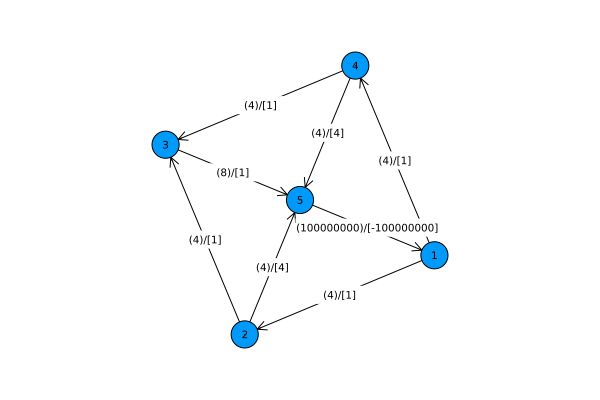

In [22]:
M = 100000000
Cmax = 
    [0 4 0 4 0;
     0 0 4 0 4;
     0 0 0 0 8;
     0 0 4 0 4;
     M 0 0 0 0;
     ]
Costs =    
[0 1 0 1 0;
0 0 1 0 4;
0 0 0 0 1;
0 0 1 0 4;
-M 0 0 0 0;
]
s = 1
t = 5
n=size(Cmax,1)

graph(Cmax, Costs)

En este grafo hay varios diferentes flujos máximos:
* 1 -> 4 (4), 1 -> 2 (4), 2 -> 5 (4), 4 -> 5 (4).  El flujo máximo es 8 y el coste total sería 40.
* 1 -> 4 (4), 1 -> 2 (4), 2 -> 3 (4), 4 -> 3 (4), 3 -> 5 (8).  Este flujo también es máximo. Sin embargo, el coste total sería 24.


In [23]:
model = Model(GLPK.Optimizer)
set_silent(model)

# Definir variables
@variable(model, x[1:n,1:n] >= 0)

# Definir función objetivo
@objective(model, Min, sum(Costs[i,j] * x[i,j] for i in 1:n, j in 1:n ))

# Definir restricciones
for i in 1:n
        for j in 1:n
                if Cmax[i, j] > 0
                        @constraint(model, x[i, j] <= Cmax[i, j])
                else
                        set_upper_bound(x[i,j], 0)
                end
        end
end
@constraint(model, c[i = 1:n],  sum(x[i, :])  - sum(x[:, i]) == 0)

optimize!(model)

Comprobamos que el flujo máximo que se consigue es el de coste mínimo, en este caso el de coste total 24.

In [24]:
objetive = objective_value(model) + value(x[t, s]) * M
println("Coste mínimo: ", objetive)

println("Flujo máximo: ", value(x[t, s]))

println("Flujos en los arcos:")
for i in 1:n
    for j in 1:n
        if value(x[i, j]) > 0 && i != t && j != s
            println("  Nodo $i")
            println("    Flujo de $i->$j: ", value(x[i, j]), " coste ", Costs[i, j] * value(x[i, j]))
        end
    end
end

Coste mínimo: 24.0
Flujo máximo: 8.0
Flujos en los arcos:
  Nodo 1
    Flujo de 1->2: 4.0 coste 4.0
  Nodo 1
    Flujo de 1->4: 4.0 coste 4.0
  Nodo 2
    Flujo de 2->3: 4.0 coste 4.0
  Nodo 3
    Flujo de 3->5: 8.0 coste 8.0
  Nodo 4
    Flujo de 4->3: 4.0 coste 4.0


Podemos comprobar con este pequeño ejemplo que el problema está correctamente modelizado.

## Bibliografía:
* Salazar González,J.J. (2001). Programación matemática.